# Deep Learning for Recommender Systems (Part 1)

In this notebook, we will attempt to create a neural network for recommender systems. There are a few different ways we can go about this. One would be to implement a spare matrix factoring algorithm in `Keras`. In a method outlined by [Alkahest](https://fenris.org/2016/03/07/index-html), it essentially added user and movie embeddings into a `Keras` model, and ran the model. This can prove effective and can actually result in an even better `RMSE` score than we have seen, as we can see from [this example here](https://github.com/khanhnamle1994/movielens/blob/master/Deep_Learning_Model.ipynb).<br>

After some research, I found out that fairly recently, `tensorflow` had launched a new library called `tensorflow-recommenders`. Henceforth we will refer to this as `TFRS`. In this notebook, I shall be attempting to use this library to build a deep learning model.

![movixai](images/movixai.png)

This is the **fourth** of five notebooks:<br>
[1. Data Exploration and EDA](1_Data_Exploration_and_EDA.ipynb)</br>
[2. Simple Content and Collaborative Filtering Methods](2_Simple_Content_and_Collaborative_Filtering_Models.ipynb)</br>
[3. Surprise Library Models](3_Surprise_Library_Models.ipynb)</br>
**4. Deep Learning Part 1 (Current Notebook)**</br>
[5. Deep Learning Part 2](5_Deep_Learning_Part_2_(Introducing_more_features_and_layers).ipynb)</br>

Contents of this notebook:<br>
[1. Imports](#Imports)<br>
[2. Reading in the data](#Reading-in-the-data)<br>
[3. TensorFlow Recommenders](#TensorFlow-Recommenders)<br>
[4. ](#)

## Imports

In [1]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import tensorflow_recommenders as tfrs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Reading in the data

In [4]:
# reading in the data from csv files
df = pd.read_csv('./datasets/merged_users+movies.csv')
movie_df = pd.read_csv('./datasets/movies.csv')

In [5]:
# checking first 5 rows of data
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure Animation Children Comedy Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure Animation Children Comedy Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure Animation Children Comedy Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure Animation Children Comedy Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action Crime Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action Drama Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror Thriller


---

## TensorFlow Recommenders

Let's first start by discussing some basic details about the Neural Network model.

mention that this architecture is the standard format for NN for recommender systems.

For our first run of 

In a deep learning model, we can make use of features that we were not able to do so with our `SVD` model previously.<br>

We will attempt to create a deep learning model using all 6 features of our dataset. Namely these are: `userId`, `movieId`, `rating`, `timestamp`, `title`, `genres`.

We will be building a two step model, as is outlined in the tensorflow-recommenders guide. A retrieval model, and a ranking model. These two models will allow us to ....

We will first start with the retrieval model.

---

## Retrieval Model

In order to add all the features to our model, we will need to create `embeddings` for each of them. We can use the `Embedding` method in `Keras` to help with this. Let's start by first creating a tensorflow compatible dataset that we will then use for creation of any `embeddings` we need.

Converting our all our `movieIds` to a tensorflow dataset that will work with methods like `batch` and `map`.

We will continue to follow the documentation and steps outlined in the `TFRS` guide and documentation.

In [ ]:
# defining an empty dictionary to store the predicted ratingsaaaaaaaaaaaaaaaaaa

In [6]:
# creating a dict of our data for conversion to tensorflow MapDataset object

retrieval_dataset = {
    'movieId': df['movieId'].tolist(),
    'userId': df['userId'].tolist(),
}

In [7]:
# converting to tensor
retrieval_dataset = tf.data.Dataset.from_tensor_slices(retrieval_dataset)

In [8]:
# converting to tensorflow MapDataset object
retrieval_dataset = retrieval_dataset.map(lambda x: {
    'movieId': x['movieId'],
    'userId': x['userId'],
})

# creating separate datasets in case we need to use them
movies = retrieval_dataset.map(lambda x: x['movieId'])
users = retrieval_dataset.map(lambda x: x['userId'])

In [9]:
# sanity check once again to ensure that we have 
# a 'MapDataset' object
retrieval_dataset

<MapDataset element_spec={'movieId': TensorSpec(shape=(), dtype=tf.int32, name=None), 'userId': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

Now let's create the vocabularies for our `categorical` embeddings.

### MovieIds and UserIds

In [10]:
# creating a list of unique userIds
unique_user_ids = np.unique(df['userId'].tolist())

# creating a list of unique movieIds
unique_movie_ids = np.unique(df['movieId'].tolist())

In [ ]:
# defining an empty dictionary to store the predicted ratingsaaaaaaaaaaaaaaaaaa

In [11]:
# defining the embedding dimension that we will use across all 
# embedding layers. We have kept this number relatively small 
# so that the model will work a little faster.
embedding_dimension = 32

## Simple Query Tower

For a simple candidate tower, all we need to do is to create the embeddings for our `userId`s, and encode them as vectors categorically. This will then be passed into the combined `RetrievalModel`.

In [12]:
# embedding unique userIds
user_id_model = tf.keras.Sequential([
    tf.keras.layers.IntegerLookup(
        vocabulary=unique_user_ids, mask_token=None),
    # We add some additional embeddings to account for unknown tokens.
    tf.keras.layers.Embedding(len(unique_user_ids) + 1, 
                              embedding_dimension)
])

In [32]:
# check to see how the vector looks like
user_id_model([42])

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.03218628, -0.29991904, -1.4709533 ,  0.79982907,  0.28533638,
        0.4449038 ,  1.0216197 , -0.24397618, -0.17255548, -0.68335485,
       -1.2154953 ,  0.4581853 ,  0.9837076 ,  1.6405902 , -0.26882863,
       -0.66250825, -0.12483787,  0.8568213 , -0.11697305, -0.08447923,
        0.23856436,  0.32793072, -1.0313882 ,  0.05914577,  0.6341576 ,
       -0.87166214,  0.42953235,  0.94289476,  0.5656831 , -0.33060247,
       -0.81066746,  0.02939052], dtype=float32)>

## Simple Candidate Tower

For a simple candidate tower, all we need to do is to create the embeddings for our `movieId`s, and encode them as vectors categorically. This will then be passed into the combined `RetrievalModel`.

In [13]:
# embedding unique movie titles
movie_id_model = tf.keras.Sequential([
    tf.keras.layers.IntegerLookup(
        vocabulary=unique_movie_ids, mask_token=None), 
    # We add some additional embeddings to account for unknown tokens.    
    tf.keras.layers.Embedding(len(unique_movie_ids) + 1, 
                              embedding_dimension)
])


In [33]:
movie_id_model([9772])

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 9.3959272e-05,  3.8053963e-02,  2.0446051e-02, -3.0094778e-02,
        1.1327885e-02,  3.7371647e-02,  1.3864052e-02,  3.5115704e-03,
       -2.6398674e-03, -1.6805209e-02,  4.6330545e-02,  4.5780730e-02,
       -2.2825075e-02,  2.8061774e-02, -4.6135593e-02,  2.7647782e-02,
       -2.4097705e-02, -2.7792191e-02,  4.5997944e-02, -3.6104809e-02,
       -3.6425449e-02,  3.0514430e-02,  2.6748668e-02, -4.7357868e-02,
       -1.6277611e-02, -2.5751472e-02, -4.0266119e-02, -2.1884179e-02,
        1.5574638e-02, -4.1466225e-02,  2.7105678e-02,  2.0292174e-02],
      dtype=float32)>

---

With this done, we can move on to building the candidate and query towers.

## Basic Retreival Model

First we need to define the metrics and task. We will pass the `userId` and `movieId` embeddings into the model. The model will then calculate affinity scores for each (`userId`, `movieId`) pair. This score then gets compared to all other possible candidates. The highest possible score is the pair that will eventually get recommended.

We can use the `FactorizedTopK` metric that is inbuilt into the `tensorflow-recommenders` library. We only need to pass our `movieId` dataset into the metric, and convert it to embeddings, via our `movie_id_model`. We can think of it as sort of like our `target`.

In [14]:
# instantiating 'FactorizedTopK' metric and passing in the movies data
metrics = tfrs.metrics.FactorizedTopK(
  candidates=movies.batch(128).map(movie_id_model)
)

In the `TFRS`, there are several loss layers and tasks to help define the loss function that will train our model.
In this instance, we'll make use of the `Retrieval` task object: a convenience wrapper that bundles together the loss function and metric computation.

In [ ]:
# using the wrapper to bundle our metric and loss function together
task = tfrs.tasks.Retrieval(
  metrics=metrics
)

In [ ]:
# defining an empty dictionary to store the predicted ratingsaaaaaaaaaaaaaaaaaa

In [16]:
class MovielensModel_basic_retrieval(tfrs.Model):

    def __init__(self, user_model, movie_model):
        super().__init__()
        self.movie_model: tf.keras.Model = movie_model
        self.user_model: tf.keras.Model = user_model
        self.task: tf.keras.layers.Layer = task

    def compute_loss(self, features, training=False) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.user_model(features['userId'])
        # And pick out the movie features and pass them into the movie model,
        # getting embeddings back.
        positive_movie_embeddings = self.movie_model(features['movieId'])

        # The task computes the loss and the metrics.
        return self.task(user_embeddings, positive_movie_embeddings)

With this, we can move on to training our model.

---

## Train, Test split

Now we are ready to train our model, let's do a `train_test_split` on our data.

In [ ]:
# defining an empty dictionary to store the predicted ratingsaaaaaaaaaaaaaaaaaa

In [17]:
# setting random seed
tf.random.set_seed(42)

# shuffling the dataset to create a "training" dataset
retrieval_shuffled = retrieval_dataset.shuffle(100_000, 
                           seed=42,
                           reshuffle_each_iteration=False
                                              )

# taking the first 80_836 ratings
retrieval_train = retrieval_shuffled.take(80_836)

# taking the next 20_000 ratings
retrieval_test = retrieval_shuffled.skip(80_836).take(20_000)


# caching the train and test dataset to speed up model fitting
retrieval_cached_train = retrieval_train.shuffle(100_000)\
                            .batch(8192).cache()
retrieval_cached_test = retrieval_test.batch(4096).cache()

In [87]:
# defining the number of epochs we will run
num_epochs = 10

# instantiate our basic retrieval model
basic_retrieval_model = MovielensModel_basic_retrieval(user_id_model, 
                                                       movie_id_model)

# compiling model with Adagrad optimizer, and a learning rate of 0.1
basic_retrieval_model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [88]:
# fitting our model
basic_retrieval_hist = basic_retrieval_model.fit(
    retrieval_cached_train,
    validation_data=retrieval_cached_test,
    validation_freq=1,
    epochs=num_epochs,
    verbose=1
)

Epoch 1/10
10/10 [==============================] - 144s 15s/step - factorized_top_k/top_1_categorical_accuracy: 0.0020 - factorized_top_k/top_5_categorical_accuracy: 0.0058 - factorized_top_k/top_10_categorical_accuracy: 0.0109 - factorized_top_k/top_50_categorical_accuracy: 0.0356 - factorized_top_k/top_100_categorical_accuracy: 0.0529 - loss: 62129.7365 - regularization_loss: 0.0000e+00 - total_loss: 62129.7365 - val_factorized_top_k/top_1_categorical_accuracy: 5.0000e-05 - val_factorized_top_k/top_5_categorical_accuracy: 5.0000e-05 - val_factorized_top_k/top_10_categorical_accuracy: 1.0000e-04 - val_factorized_top_k/top_50_categorical_accuracy: 3.5000e-04 - val_factorized_top_k/top_100_categorical_accuracy: 9.0000e-04 - val_loss: 29816.2461 - val_regularization_loss: 0.0000e+00 - val_total_loss: 29816.2461
Epoch 2/10
10/10 [==============================] - 145s 15s/step - factorized_top_k/top_1_categorical_accuracy: 0.0067 - factorized_top_k/top_5_categorical_accuracy: 0.0129 - fa

### Basic Retrieval Model Evaluation

In [89]:
basic_retrieval_model.evaluate(retrieval_cached_test, return_dict=True)

5/5 [==============================] - 29s 6s/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 1.0000e-04 - factorized_top_k/top_100_categorical_accuracy: 2.0000e-04 - loss: 34239.2734 - regularization_loss: 0.0000e+00 - total_loss: 34239.2734


{'factorized_top_k/top_1_categorical_accuracy': 0.0,
 'factorized_top_k/top_5_categorical_accuracy': 0.0,
 'factorized_top_k/top_10_categorical_accuracy': 0.0,
 'factorized_top_k/top_50_categorical_accuracy': 9.999999747378752e-05,
 'factorized_top_k/top_100_categorical_accuracy': 0.00019999999494757503,
 'loss': 31079.95703125,
 'regularization_loss': 0,
 'total_loss': 31079.95703125}

As we can see from the above, the model's accuracy score is pretty bad. The model has got only **0.105%** for the `factorized_top_k/top_100_categorical_accuracy` metric. <br>
The way to interprete this metric is that, the chance of a true positive for a user being in the top 100 recommendations, is only **0.1%**.

Now let's evaluate the model by plotting the `train_loss` against the `test_loss`.

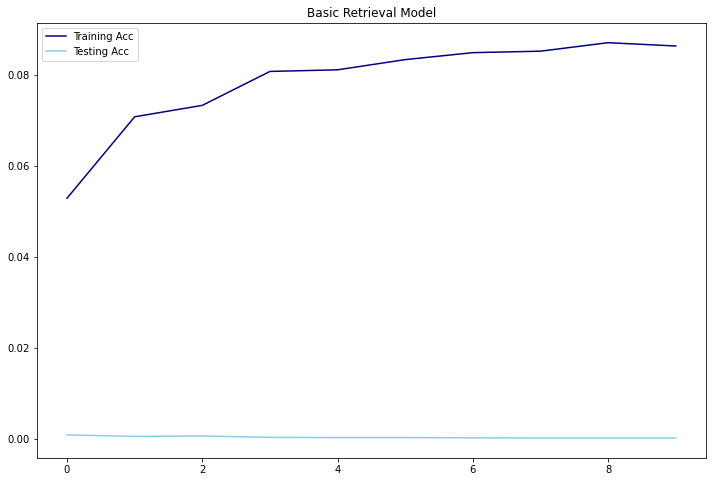

In [93]:
# defining train and test loss from the model history
train_loss = basic_retrieval_hist.history['factorized_top_k/top_100_categorical_accuracy']
test_loss = basic_retrieval_hist.history['val_factorized_top_k/top_100_categorical_accuracy']

# creating a train vs test loss plot
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Acc', color='navy')
plt.plot(test_loss, label='Testing Acc', color='skyblue')
plt.title('Basic Retrieval Model')
plt.legend();

As we can see from the graph above, the `training_acc` did see some improvement, however the `testing_acc` barely moved. From the `model.evaluate()` method, we saw that the final model `top 100 accuracy` was **0.1%**. In the next notebook, we will explore how we can improve this score. We will consider factors like number of epochs, and adding more features to our model.

### Querying the Basic Retrieval Model

Let's test querying the model for retrieving potential recommendations for a `userId`. For this we will make use of `BruteForce` as outlined in the tensorflow-recommender system guide.

In [31]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(basic_retrieval_model\
                                                .user_model,
                                                k=100)

# recommends movies out of the entire movies dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((movies.batch(1024), 
                       movies.batch(1024).map(basic_retrieval_model\
                                              .movie_model)
                      )
                     )
)

# Get recommendations for a random 'userId', 42
_, titles = index(tf.constant([42]))
print(f"Recommendations for user 42: {np.unique(titles)}")

Recommendations for user 42: [ 408  418  424  459  486  490 2263 2497 2500 2771 3142 3326 3502 3694
 3695 3764 3824 4207 4317 4442 4466 4541 4565 4577 4629 4686]


Now we have recommendations for `userId` **42**. However, just for sanity's sake, lets check once to see if these are new titles that are being recommended, or if some of these titles have already been seen by this user.

In [34]:
# get a list of movieIds already watched by userId 42
seen_titles_42 = df.loc[df['userId'] == 42, 'movieId'].unique().tolist()

# defining a list of unique recommended titles for userId 42
unique_reco_titles = np.unique([title for title in titles.numpy()[0]])

# getting a list of repeated titles
repeated_title_reco = [title for title in unique_reco_titles if title in seen_titles_42]

if repeated_title_reco:
    for title in repeated_title_reco:
        print(f'{title} is a repeated title')
else:
    print(f'{len(repeated_title_reco)} recommendations are repeated.')

408 is a repeated title
418 is a repeated title
424 is a repeated title
459 is a repeated title
486 is a repeated title
490 is a repeated title
2263 is a repeated title
2497 is a repeated title
2500 is a repeated title
2771 is a repeated title
3142 is a repeated title
3326 is a repeated title
3502 is a repeated title
3694 is a repeated title
3695 is a repeated title
3764 is a repeated title
3824 is a repeated title
4207 is a repeated title
4317 is a repeated title
4442 is a repeated title
4466 is a repeated title
4541 is a repeated title
4565 is a repeated title
4577 is a repeated title
4629 is a repeated title
4686 is a repeated title


Here it seems that the model is recommending movies that the user has already watched. If a user has already watched a movie, it might skew the accuracy rating is it has already been a true positive. Most likely, this can be avoided with more training and a deeper model. We will explore this in the next notebook, [Deep Learning - Part 2](5_Deep_Learning_Part_2_(Introducing_more_features_and_layers).ipynb). 

For now we will continue on building a basic model.

## Basic Ranking Model

In [35]:
ranking_dataset = {
    'movieId': df['movieId'].tolist(),
    'userId': df['userId'].tolist(),
    'rating': df['rating'].tolist()
}

ranking_dataset = tf.data.Dataset.from_tensor_slices(ranking_dataset)

ranking_dataset = ranking_dataset.map(lambda x: {
    'movieId': x['movieId'],
    'userId': x['userId'],
    'rating': x['rating']
})

In [36]:
tf.random.set_seed(42)
shuffled_ranking = ranking_dataset.shuffle(100_000,
                                           seed=42, 
                                           reshuffle_each_iteration=False
                                          )

ranking_train = shuffled_ranking.take(80_836)
ranking_test = shuffled_ranking.skip(80_836).take(20_000)

In [37]:
cached_ranking_train = ranking_train.shuffle(100_000)\
                        .batch(8192).cache()

cached_ranking_test = ranking_test.batch(4096).cache()

In [56]:
class RankingModel_basic(tf.keras.Model):

    def __init__(self):
        super().__init__()
        embedding_dimension = 32

        # Compute embeddings for users.
        # using previously defined and created user_id_model
        self.user_embedding = user_id_model

        # Compute embeddings for movies.
        # using previously defined and created movie_id_model
        self.movie_id_embedding = movie_id_model

        # Compute predictions.
        self.ratings = tf.keras.Sequential([
            # Learn multiple dense layers.
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            # Make rating predictions in the final layer.
            tf.keras.layers.Dense(1)
        ])

    def call(self, inputs):

        userId, movieId = inputs

        user_embedding = self.user_embedding(userId)
        movie_id_embedding = self.movie_id_embedding(movieId)

        return self.ratings(tf.concat([user_embedding, movie_id_embedding], axis=1))

In [57]:
class MovielensModel_basic_ranking(tfrs.models.Model):

    def __init__(self):
        super().__init__()
        self.ranking_model: tf.keras.Model = RankingModel_basic()
        self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
          loss = tf.keras.losses.MeanSquaredError(),
          metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

    def call(self, features):
        return self.ranking_model(
            (features['userId'], features['movieId']))

    def compute_loss(self, features, training=False):
        labels = features.pop('rating')

        rating_predictions = self(features)

        # The task computes the loss and the metrics.
        return self.task(labels=labels, predictions=rating_predictions)

In [58]:
basic_ranking_model = MovielensModel_basic_ranking()

basic_ranking_model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [59]:
num_epochs = 10

basic_ranking_hist = basic_ranking_model.fit(
    cached_ranking_train, 
    validation_data=cached_ranking_test,
    validation_freq=1,
    epochs=num_epochs,
    verbose=1
)

Epoch 1/10
10/10 [==============================] - 2s 95ms/step - root_mean_squared_error: 3.4005 - loss: 10.5093 - regularization_loss: 0.0000e+00 - total_loss: 10.5093 - val_root_mean_squared_error: 1.1042 - val_loss: 1.2172 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.2172
Epoch 2/10
10/10 [==============================] - 0s 29ms/step - root_mean_squared_error: 1.0452 - loss: 1.0814 - regularization_loss: 0.0000e+00 - total_loss: 1.0814 - val_root_mean_squared_error: 1.0083 - val_loss: 1.0129 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.0129
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.9644 - loss: 0.9245 - regularization_loss: 0.0000e+00 - total_loss: 0.9245 - val_root_mean_squared_error: 0.9487 - val_loss: 0.8955 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.8955
Epoch 4/10
10/10 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9340 - loss: 0.8695 - regularization_

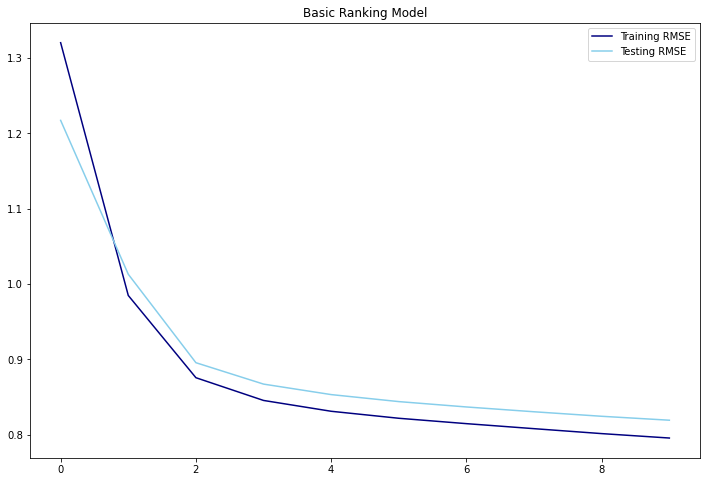

In [63]:
# defining train and test loss from the model history
ranking_train_rmse = basic_ranking_hist.history['loss']
ranking_test_rmse = basic_ranking_hist.history['val_loss']

# creating a train vs test loss plot
plt.figure(figsize=(12, 8))
plt.plot(ranking_train_rmse, label='Training RMSE', color='navy')
plt.plot(ranking_test_rmse, label='Testing RMSE', color='skyblue')
plt.title('Basic Ranking Model')
plt.legend();

From the above chart, we can see that after the first epoch, we already seem to be experiencing overfitting. However, at the very least, we can see that the `val_rmse` did continue dropping and it does seem to have more to go if the model is tuned.<br>

Let's also evaluate the model.

In [61]:
basic_ranking_model.evaluate(cached_ranking_test, return_dict=True)

5/5 [==============================] - 0s 17ms/step - root_mean_squared_error: 0.9103 - loss: 0.8268 - regularization_loss: 0.0000e+00 - total_loss: 0.8268


{'root_mean_squared_error': 0.9102557301521301,
 'loss': 0.8191344738006592,
 'regularization_loss': 0,
 'total_loss': 0.8191344738006592}

Even a simple Neural Network like this has given us a `val_rmse` of **0.9103**. This isn't the best score, however, now that we have a baseline, we can attempt to improve this score.

---

Now let's take a look at how we can obtain the predicted ratings for a given `userId` and a given set of `movieId`s.

In [76]:
%%time
# defining an empty dictionary to store the predicted ratings
test_ratings = {}

# defining the movie ids
test_movie_ids = [160341, 6, 9772]
for movie_id in test_movie_ids:
    test_ratings[movie_id] = basic_ranking_model({
      "userId": np.array([42]),
      "movieId": np.array([movie_id])
    })[0][0]

print("Ratings:")
for movie_id, score in sorted(test_ratings.items(), key=lambda x: x[1], reverse=True):
  print(f"{movie_id}: {score}")
print('\n')

Ratings:
6: 4.075359344482422
9772: 3.523047924041748
160341: 3.3970587253570557


CPU times: total: 46.9 ms
Wall time: 37.9 ms


So as we can see from the above, we can obtain the `predicted_ratings` fairly quickly, in about **45ms**.

Having a model that can return the score quickly is important so the the user will not have to wait for recommenders to appear on their page as we have mentioned before.

---
We will save the scores that we saw for the basic models as a csv so that we can access them again in the next notebook.

In [81]:
retrieval_model_scores = {'model_name': ['basic_retrival_model'],
                          'top-100 accuracy': [0.001049]
                         }

ranking_model_scores = {'model_name':['basic_ranking_model'],
                        'rating_rmse': [0.9102]
                       }

In [82]:
retrieval_model_scores = pd.DataFrame(retrieval_model_scores)
retrieval_model_scores

,model_name,top-100 accuracy
0,basic_retrival_model,0.001049


In [83]:
ranking_model_scores = pd.DataFrame(ranking_model_scores)
ranking_model_scores

,model_name,rating_rmse
0,basic_ranking_model,0.9102


In [84]:
retrieval_model_scores.to_csv('./datasets/retrieval_model_scores.csv', index=False)
ranking_model_scores.to_csv('./datasets/ranking_model_scores.csv', index=False)

In the next notebook, we will explore on making our models deeper, and adding more features into the basic models.